In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_files = ["D:/B. Sc (Hon's) Computer Science/Year 3/CN6000 - Mental Wealth; Professional Life 3 (Project)/Final Code/Dataset/MPU6050_Data.csv"]

In [3]:
df = [pd.read_csv(filename) for filename in csv_files]

In [4]:
df = pd.concat(df)

In [5]:
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,4.390759,-3.274514,-2.917081,56.183964,-5.986999,32.459366,Walking
1,4.869289,-3.267678,-2.394604,34.946503,-3.067965,27.045748,Walking
2,4.410291,-3.456160,-2.505936,0.595721,4.951933,27.976563,Walking
3,4.762841,-3.481552,-3.250099,-30.210516,10.894254,19.889645,Walking
4,6.446486,-4.273568,-4.065554,-45.580128,-8.623066,-5.324259,Walking


In [6]:
df.tail()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
90818,5.122227,-4.163213,4.380016,0.052126,2.516922,-2.874355,Standing
90819,5.247231,-4.109500,4.378063,-0.953154,3.149876,-3.462630,Standing
90820,5.329264,-4.177862,4.427869,-1.749931,3.298807,-2.479690,Standing
90821,5.306803,-4.112430,4.279428,-1.474410,1.787164,-0.744652,Standing
90822,5.229652,-4.149541,4.217902,0.372326,-0.119144,0.774438,Standing


In [7]:
df.shape

(90823, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90823 entries, 0 to 90822
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ax        90823 non-null  float64
 1   Ay        90823 non-null  float64
 2   Az        90823 non-null  float64
 3   Gx        90823 non-null  float64
 4   Gy        90823 non-null  float64
 5   Gz        90823 non-null  float64
 6   Activity  90823 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.9+ MB


In [9]:
print(df['Activity'].unique())

['Walking' 'Jogging' 'Stairs' 'Sitting' 'Standing']


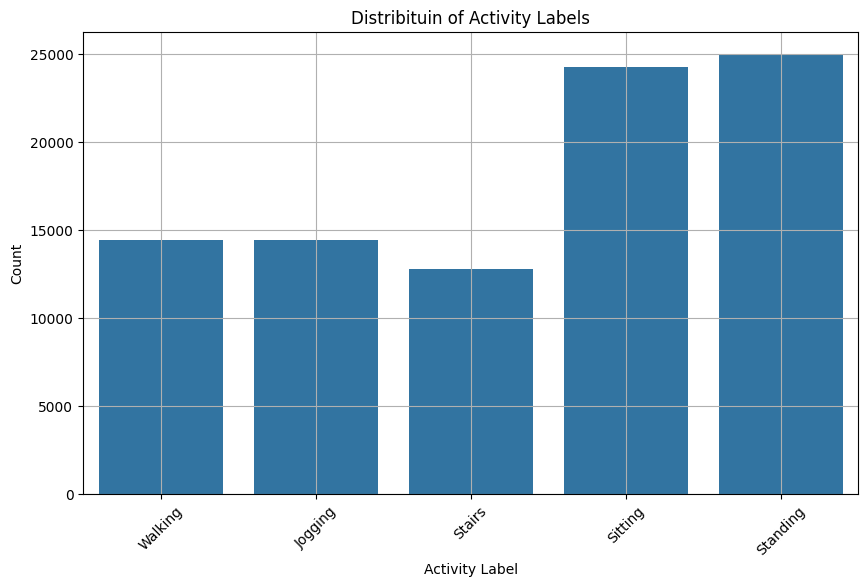

In [10]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Activity', data = df)
plt.title('Distribituin of Activity Labels')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [11]:
print(df['Activity'])

0         Walking
1         Walking
2         Walking
3         Walking
4         Walking
           ...   
90818    Standing
90819    Standing
90820    Standing
90821    Standing
90822    Standing
Name: Activity, Length: 90823, dtype: object


In [12]:
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
Standing    24984
Sitting     24260
Walking     14400
Jogging     14400
Stairs      12779
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()
df['Activity'] = encoder.fit_transform(df['Activity'])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
features = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]

In [17]:
scaler = StandardScaler()
df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']] = scaler.fit_transform(features)

In [18]:
print(df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].mean())
print(df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].std())

Ax   -3.279560e-16
Ay   -1.013910e-16
Az    3.630048e-17
Gx   -7.823379e-18
Gy   -1.134390e-17
Gz    9.730327e-19
dtype: float64
Ax    1.000006
Ay    1.000006
Az    1.000006
Gx    1.000006
Gy    1.000006
Gz    1.000006
dtype: float64


In [19]:
from joblib import dump

In [20]:
dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

In [21]:
dump(encoder, 'Encoder.joblib')

['Encoder.joblib']

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
window_size = 100
step_size = 50
features_columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
label_column = 'Activity'

In [24]:
windows = []
labels = []

In [25]:
for start in range(0, df.shape[0] - window_size + 1, step_size):
    end = start + window_size
    window = df[features_columns][start:end].values
    label = df[label_column][start:end].mode()[0]
    windows.append(window)
    labels.append(label)

In [26]:
X = np.array(windows)
y = np.array(labels)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (1089, 100, 6)
Validation Set: (363, 100, 6)
Testing Set: (363, 100, 6)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [31]:
num_activities = len(np.unique(y_train))

In [32]:
y_train_encoded = to_categorical(y_train, num_classes=num_activities)
y_val_encoded = to_categorical(y_val, num_classes=num_activities)
y_test_encoded = to_categorical(y_test, num_classes=num_activities)

In [33]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(num_activities, activation='softmax'))

c:\Users\shawo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 64)        │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,757 (120.14 KB)

 Trainable params: 30,757 (120.14 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [37]:
checkpoint = ModelCheckpoint('HAR_Model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

In [38]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val_encoded),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4425 - loss: 1.4815
Epoch 1: val_accuracy improved from -inf to 0.66942, saving model to HAR_Model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.4481 - loss: 1.4728 - val_accuracy: 0.6694 - val_loss: 0.9725
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6683 - loss: 0.9360
Epoch 2: val_accuracy improved from 0.66942 to 0.74380, saving model to HAR_Model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.6700 - loss: 0.9342 - val_accuracy: 0.7438 - val_loss: 0.7339
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7974 - loss: 0.6271
Epoch 3: val_accuracy improved from 0.74380 to 0.83471, saving model to HAR_Model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.7973 - loss: 0.6258 - val_accuracy: 0.8347 - val_loss: 0.4906
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8279 - loss: 0.4925
Epoch 4: val_accuracy improved from 0.83471 

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9066 - loss: 0.2841
Test Loss: 0.30527162551879883
Test Accuracy: 0.9146005511283875


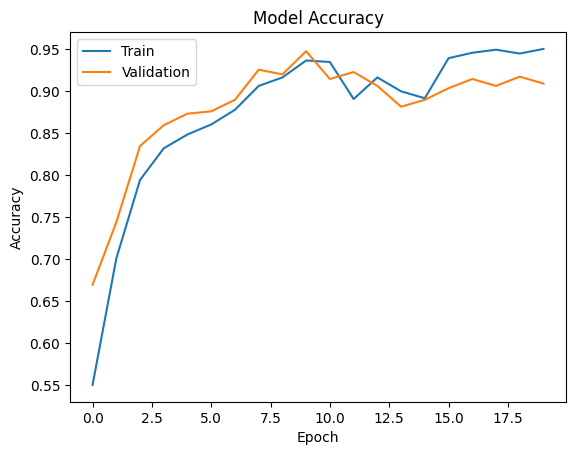

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

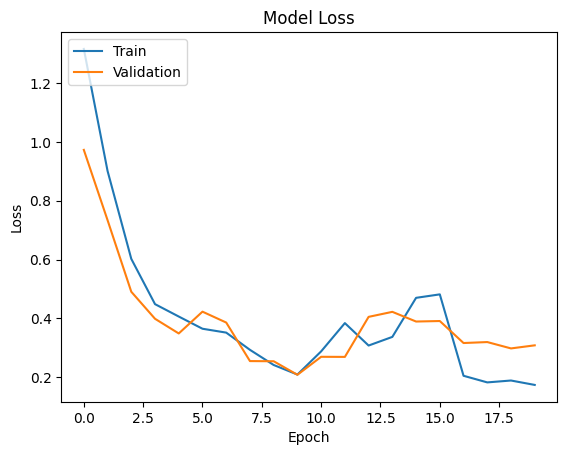

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
from tensorflow.keras.models import load_model
model = load_model('HAR_Model.keras')

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8691 - loss: 0.3356
Test Loss: 0.33148515224456787
Test Accuracy: 0.8870523571968079


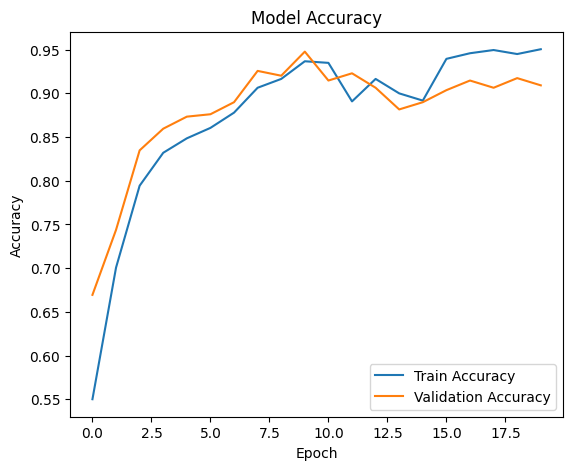

In [44]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

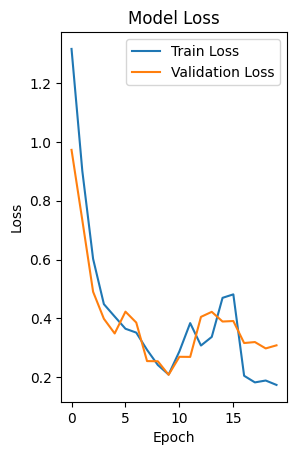

In [45]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()